# Import useful packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import data

In [2]:
raw_data = pd.read_csv("extract.txt", sep=";")
raw_data

,id,date,room,sensor,co2,tvoc,temperature,humidity,light,sound
0,1,09/02/2022 07:50:59,S219,100,320,0,23.99,33.95,411,510
1,2,09/02/2022 07:51:09,S219,101,753,0,23.18,34.62,420,447
2,3,09/02/2022 07:51:19,S219,102,591,0,23.05,35.20,415,510
3,4,09/02/2022 07:51:29,S219,103,595,0,23.16,34.77,275,511
4,5,09/02/2022 07:51:39,S219,104,771,0,23.71,33.83,349,512
...,...,...,...,...,...,...,...,...,...,...
71658,72105,25/02/2022 10:38:33,S219,101,3128,2772,28.40,37.34,469,373
71659,72106,25/02/2022 10:38:43,S219,102,3093,2047,27.89,38.94,455,513
71660,72107,25/02/2022 10:38:53,S219,103,3394,1815,27.93,39.01,670,513
71661,72108,25/02/2022 10:39:03,S219,104,3634,360,28.90,37.72,452,513


# Detect outliers

In [3]:
outlier_temp = np.where((raw_data['temperature'] >= (60)) ) # 60°C
outlier_humidity = np.where(raw_data['humidity'] >= (100)) # 100 %
outlier_tvoc = np.where(raw_data['tvoc'] >= (10000)) # 10 000 ppb
outlier_light = np.where(raw_data['light'] >= (100000)) # 10 000
outlier_sound = np.where(raw_data['sound'] >= (5000)) # 1 000

outliers = np.unique(np.concatenate((outlier_temp[0],outlier_humidity[0],outlier_tvoc[0],
                                    outlier_light[0],outlier_sound[0]),0))

In [4]:
raw_data.drop(outliers, inplace = True)
print(len(raw_data))

71446


In [5]:
raw_data.drop(['id'], axis=1)

,date,room,sensor,co2,tvoc,temperature,humidity,light,sound
0,09/02/2022 07:50:59,S219,100,320,0,23.99,33.95,411,510
1,09/02/2022 07:51:09,S219,101,753,0,23.18,34.62,420,447
2,09/02/2022 07:51:19,S219,102,591,0,23.05,35.20,415,510
3,09/02/2022 07:51:29,S219,103,595,0,23.16,34.77,275,511
4,09/02/2022 07:51:39,S219,104,771,0,23.71,33.83,349,512
...,...,...,...,...,...,...,...,...,...
71658,25/02/2022 10:38:33,S219,101,3128,2772,28.40,37.34,469,373
71659,25/02/2022 10:38:43,S219,102,3093,2047,27.89,38.94,455,513
71660,25/02/2022 10:38:53,S219,103,3394,1815,27.93,39.01,670,513
71661,25/02/2022 10:39:03,S219,104,3634,360,28.90,37.72,452,513


# Separate sensors

In [6]:
# Number of sensors
nb_sensors = len(pd.unique(raw_data['sensor'])) 
sensors_list = raw_data.sensor.unique()
print("We have ",nb_sensors," sensors. Their Id are ", [i_sensor for i,i_sensor in enumerate(sensors_list)])

We have  8  sensors. Their Id are  [100, 101, 102, 103, 104, 105, 106, 107]


In [7]:
# Separate each sensor
for i,i_sensor in enumerate(sensors_list):
    globals()['sensor_%s' % i_sensor] = raw_data.loc[raw_data["sensor"]==i_sensor]
    globals()['sensor_%s' % i_sensor] = globals()['sensor_%s' % i_sensor].set_index('date')
    globals()['sensor_%s' % i_sensor].index = pd.to_datetime(globals()['sensor_%s' % i_sensor].index,dayfirst=True)
    print('sensor_{}'.format(i_sensor))


sensor_100
sensor_101
sensor_102
sensor_103
sensor_104
sensor_105
sensor_106
sensor_107


# Analyse measured data

In [8]:
corr = raw_data.corr()
corr

,id,sensor,co2,tvoc,temperature,humidity,light,sound
id,1.000000,0.006061,0.139785,0.067261,0.170012,0.434220,-0.138455,-0.006894
sensor,0.006061,1.000000,0.173200,0.234964,0.037616,0.023126,-0.280883,0.304814
co2,0.139785,0.173200,1.000000,0.176704,0.668167,0.307492,0.208957,0.159626
tvoc,0.067261,0.234964,0.176704,1.000000,0.299879,0.075702,0.052368,0.121296
temperature,0.170012,0.037616,0.668167,0.299879,1.000000,0.166625,0.207448,0.118403
humidity,0.434220,0.023126,0.307492,0.075702,0.166625,1.000000,-0.043526,0.024436
light,-0.138455,-0.280883,0.208957,0.052368,0.207448,-0.043526,1.000000,0.248803
sound,-0.006894,0.304814,0.159626,0.121296,0.118403,0.024436,0.248803,1.000000


sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

<AxesSubplot:xlabel='sensor', ylabel='temperature'>

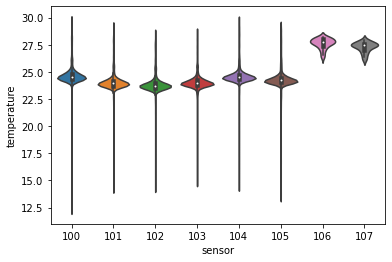

In [9]:
sns.violinplot(x="sensor", y="temperature", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='co2'>

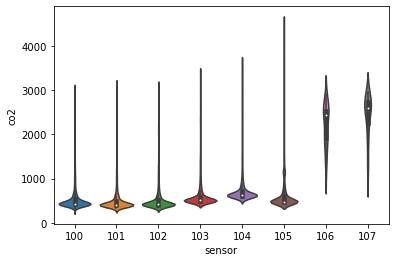

In [10]:
sns.violinplot(x="sensor", y="co2", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='tvoc'>

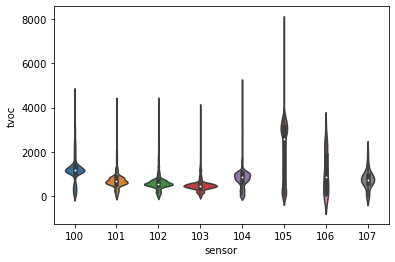

In [11]:
sns.violinplot(x="sensor", y="tvoc", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='humidity'>

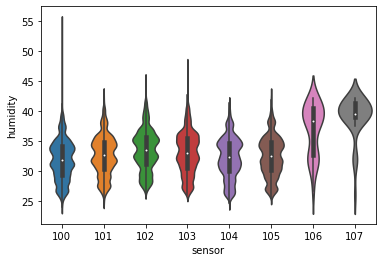

In [12]:
sns.violinplot(x="sensor", y="humidity", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='light'>

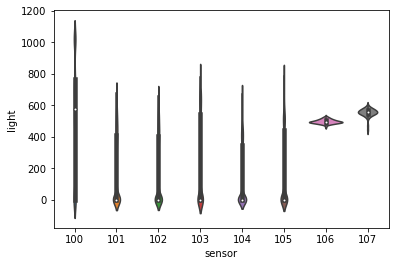

In [13]:
sns.violinplot(x="sensor", y="light", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='sound'>

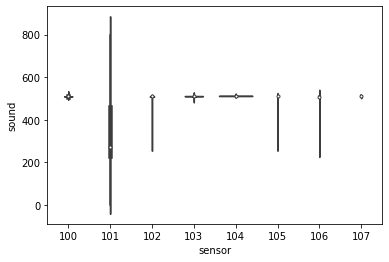

In [14]:
sns.violinplot(x="sensor", y="sound", data=raw_data)

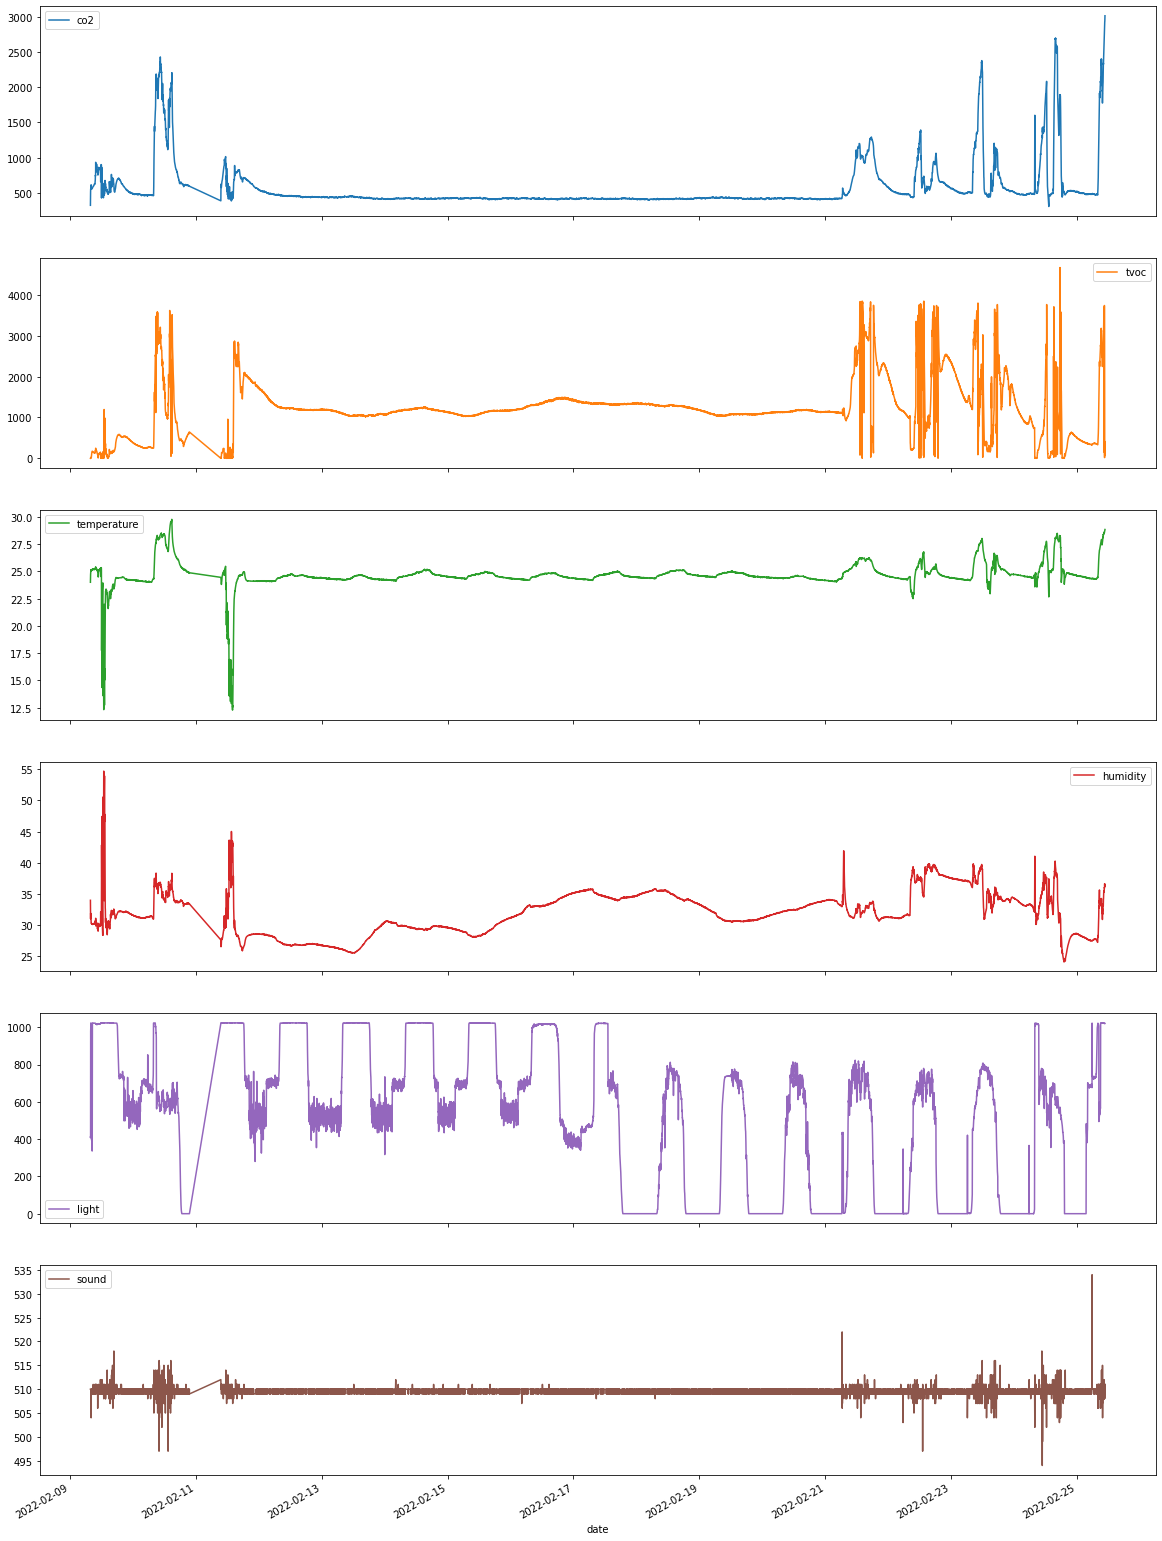

In [15]:
# for sensor 100
axs = sensor_100.drop(["id","sensor"],axis=1).plot(figsize=(20, 30), subplots=True)

Sensors to display :  [100 101 102 103 104 105 106 107]


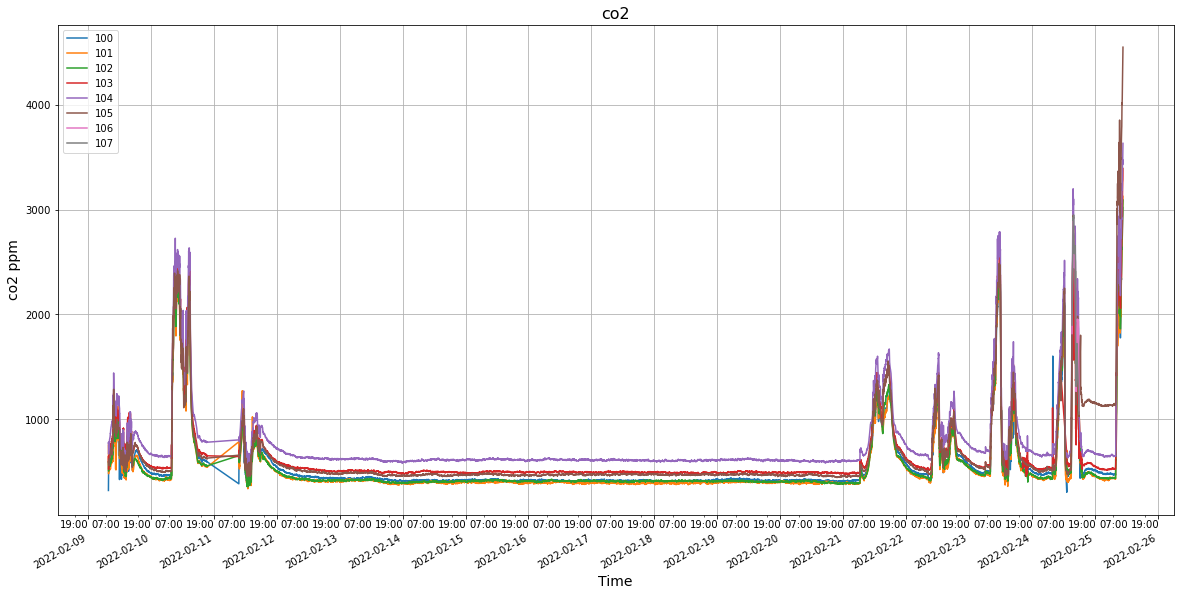

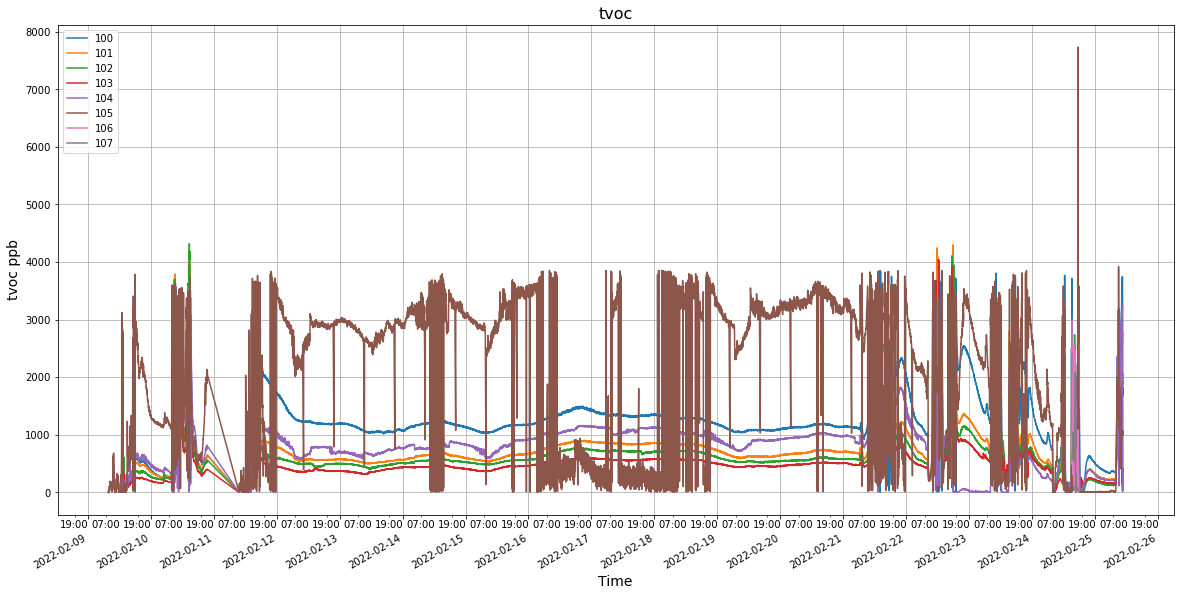

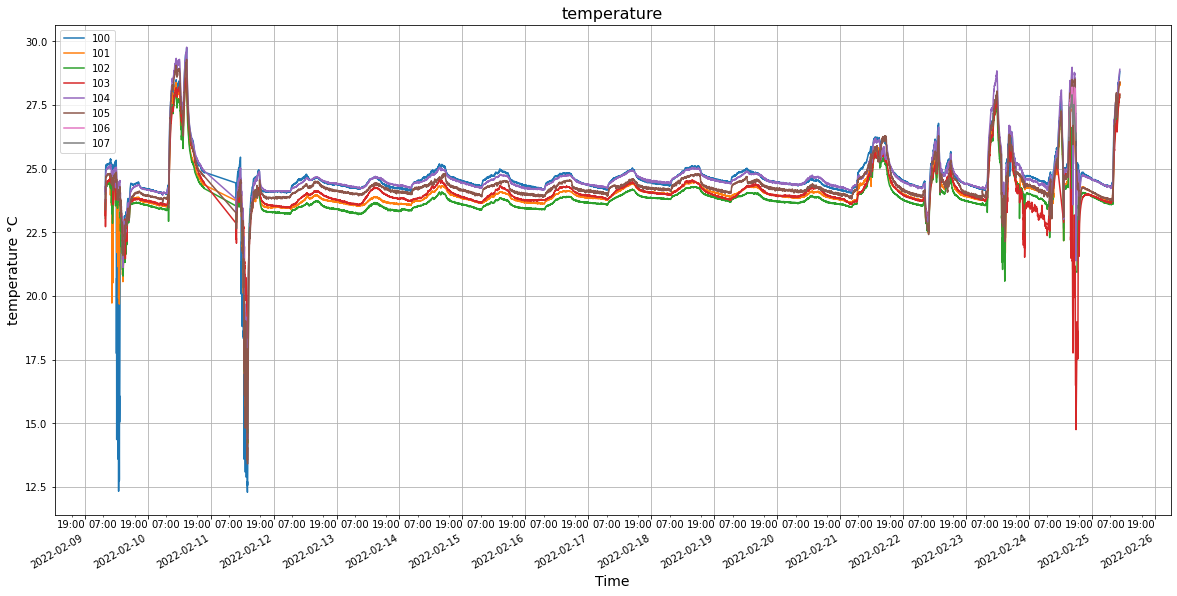

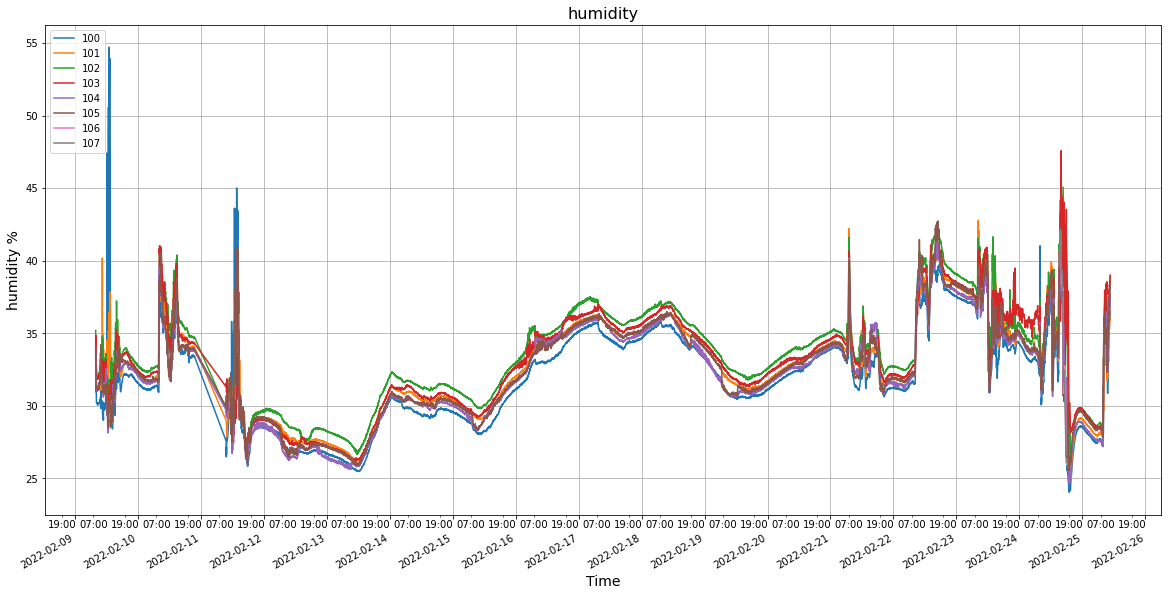

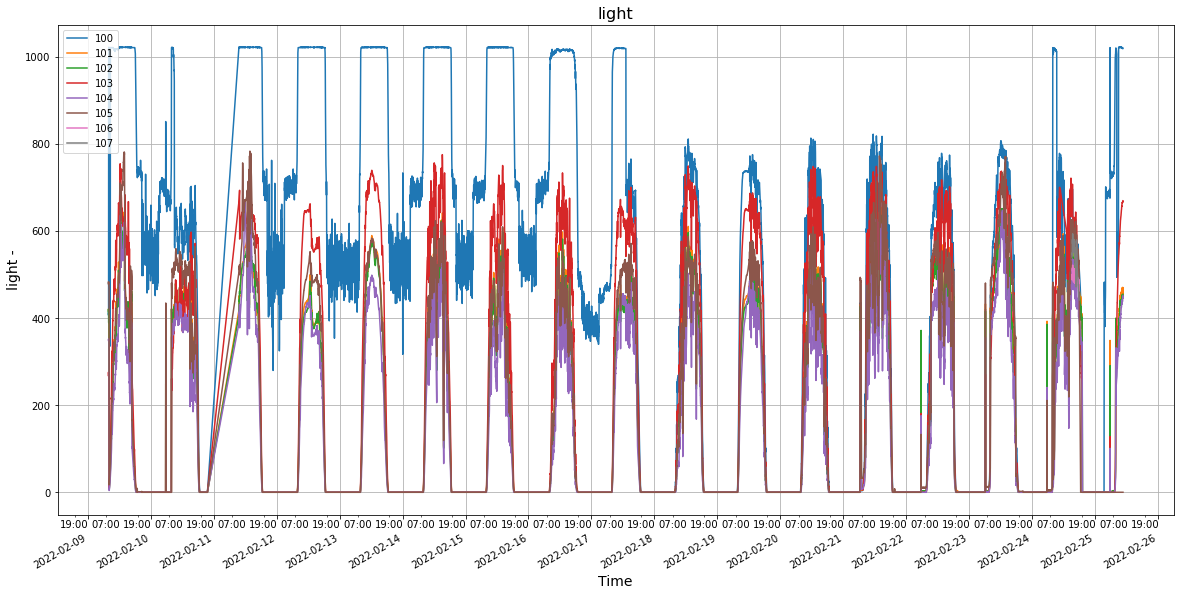

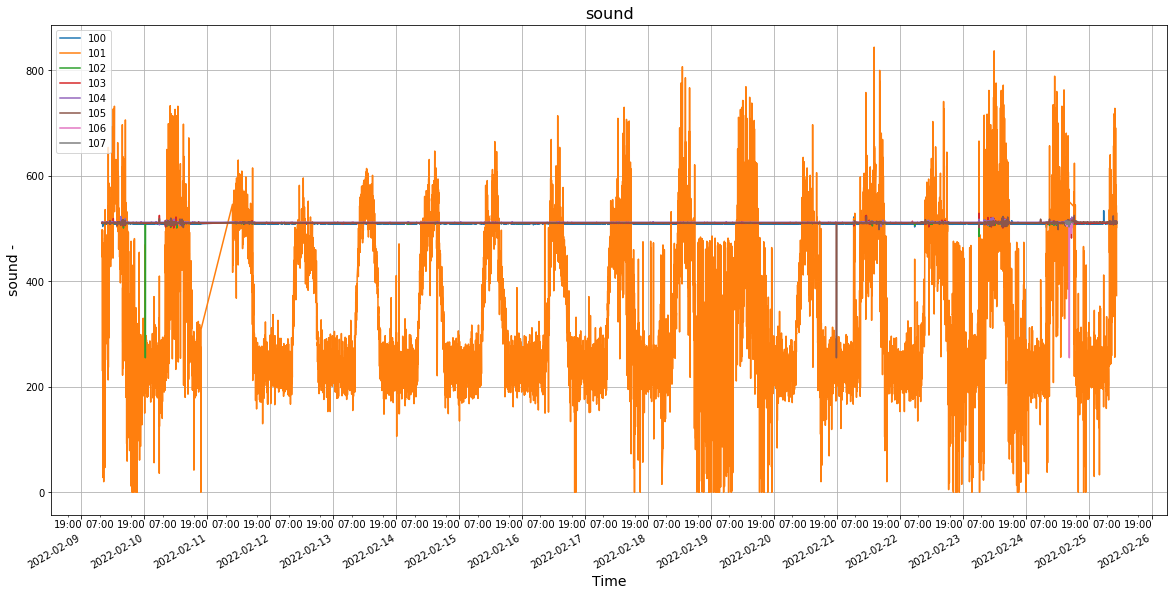

In [18]:
# Compare data from all sensors

excluded_sensors = [105,106,107]
sensors_list_updated = np.delete(sensors_list, [np.where(sensors_list == i) for i in excluded_sensors])
print("Sensors to display : ",sensors_list_updated)

values = ["co2","tvoc","temperature","humidity" ,"light","sound"]
units  = ["ppm","ppb","°C","%","-","-"]

hours = mdates.HourLocator(interval = 12)
h_fmt = mdates.DateFormatter('%H:%M')
days = mdates.DayLocator(interval=1)
d_fmt = mdates.DateFormatter('%Y-%m-%d')

for i,i_value in enumerate(values):
    fig, ax = plt.subplots(figsize=(20,10))
    
    for i_sensor in sensors_list_updated : 
        globals()['ax_%s' % i_sensor] = pd.Series(globals()['sensor_%s' % i_sensor][i_value]).plot(grid=True, 
                                                                                                   label=str(i_sensor))
    
    #df1 = pd.Series(sensor_100[i_value])
    #df2 = pd.Series(sensor_101[i_value])
    #df3 = pd.Series(sensor_102[i_value])
    #df4 = pd.Series(sensor_103[i_value])
    #df5 = pd.Series(sensor_104[i_value])
    #df6 = pd.Series(sensor_105[i_value])

    #ax1 = df1.plot(grid=True, label='100')
    #ax2 = df2.plot(grid=True, label='101')
    #ax3 = df3.plot(grid=True, label='102')
    #ax4 = df4.plot(grid=True, label='103')
    #ax5 = df5.plot(grid=True, label='104')
    #ax6 = df6.plot(grid=True, label='105')
    
    #plt.plot(sensor_101[i_value], label ="101")
    #plt.plot(sensor_102[i_value], label ="102")
    #plt.plot(sensor_103[i_value], label ="103")
    #plt.plot(sensor_104[i_value], label ="104")
    #plt.plot(sensor_105[i_value], label ="105")

    plt.ylabel((i_value+" "+units[i]), fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.title(i_value, fontsize=16)
    
    ax.xaxis.set_minor_locator(hours)
    ax.xaxis.set_minor_formatter(h_fmt)
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(d_fmt)
    ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
    plt.legend(loc="upper left")

    #display plot
    plt.show()

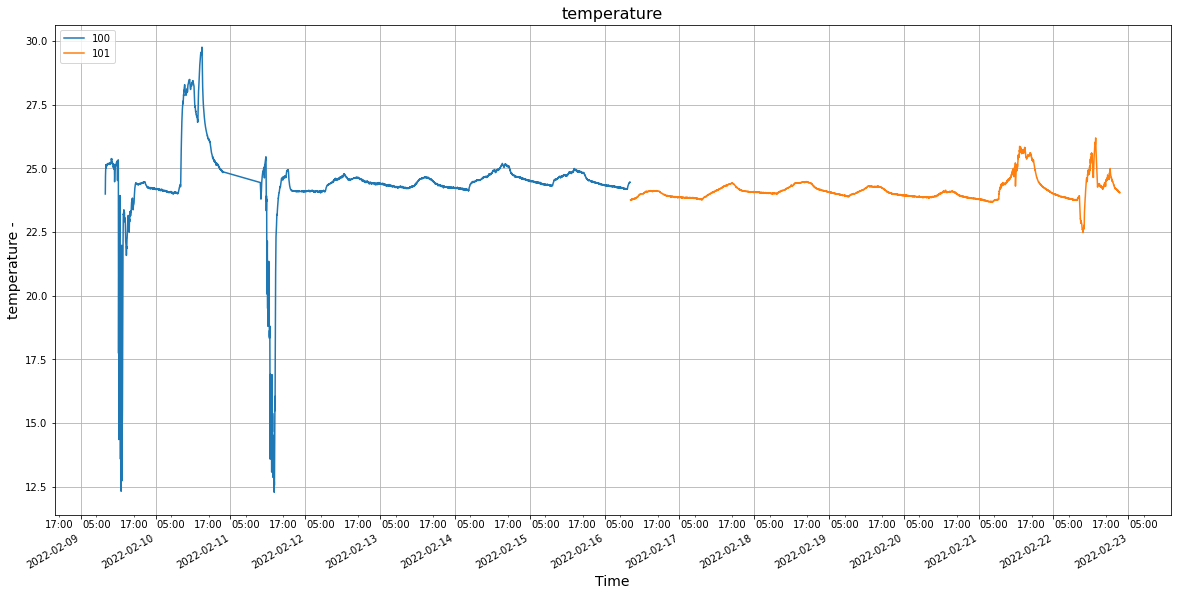

In [17]:
# Verif bonne prise en compte des dates
i_value = "temperature"
fig, ax = plt.subplots(figsize=(20,10))
df1 = pd.Series(sensor_100[i_value])[0:5000]
df2 = pd.Series(sensor_101[i_value])[5000:10000]

ax1 = df1.plot(grid=True, label='100')
ax2 = df2.plot(grid=True, label='101')

plt.ylabel((i_value+" "+units[i]), fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(i_value, fontsize=16)
    
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
plt.legend(loc="upper left")

plt.show()